In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

df = pd.read_csv('/Аринина/Swiggy_50.csv', sep=",") 
df.head() 

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


In [2]:
df.shape

(31804, 10)

In [3]:
df.dtypes

Restaurant Name            object
Category                   object
Rating                    float64
Cost for two                int64
Veg                          bool
city                       object
Area                       object
Locality                   object
Address                    object
Long Distance Delivery      int64
dtype: object

In [4]:
#Обработка пропусков
df.isna()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
31799,False,False,True,False,False,False,False,False,False,False
31800,False,False,True,False,False,False,False,False,False,False
31801,False,False,True,False,False,False,False,False,False,False
31802,False,False,True,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

Restaurant Name               0
Category                      0
Rating                    17666
Cost for two                  0
Veg                           0
city                          0
Area                          0
Locality                     24
Address                       2
Long Distance Delivery        0
dtype: int64

Нахождение пропусков у полей с типами float64 или int64

In [6]:
df['Rating'].unique()

array([3.9, 4.3, 4. , 4.2, 4.1, 3.7, nan, 4.5, 3.8, 3.4, 3.6, 4.4, 2.8,
       2.7, 3. , 3.2, 4.6, 3.5, 5. , 3.3, 3.1, 2.6, 4.7, 2.9, 4.8, 4.9,
       1.7, 1.9, 2.1, 2.3, 2.4, 2. , 2.5, 2.2, 1.5, 1.6, 1.8, 1.3, 1.1,
       1.2])

In [7]:
num_cols =[]
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка Rating. Тип данных float64. Количество пустых значений 17666.


Нахождение пропусков у полей с типами object

In [8]:
cat_cols = []
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка Locality. Тип данных object. Количество пустых значений 24.
Колонка Address. Тип данных object. Количество пустых значений 2.


Преобразование категориальных признаков в числовые

In [9]:
import sklearn

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [11]:
a = df[['Rating']]
a.head()

imp2 = SimpleImputer(missing_values = np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(a)
df_imp2

b = pd.DataFrame({'c1':df_imp2.T[0]})
b

,c1
0,3.9
1,4.3
2,4.0
3,4.2
4,4.1
...,...
31799,4.0
31800,4.0
31801,4.0
31802,4.0


In [12]:
df_new = df.dropna(axis=0, how='any')
(df.shape, df_new.shape)

df_new.isnull().sum()

Restaurant Name           0
Category                  0
Rating                    0
Cost for two              0
Veg                       0
city                      0
Area                      0
Locality                  0
Address                   0
Long Distance Delivery    0
dtype: int64

Кодирование категорий наборами бинарных значений

In [13]:
from sklearn.preprocessing import LabelEncoder

ohe = LabelEncoder()
cat_enc_ohe = ohe.fit_transform(df[['Locality']])
df.shape

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(31804, 10)

Масштабирование данных

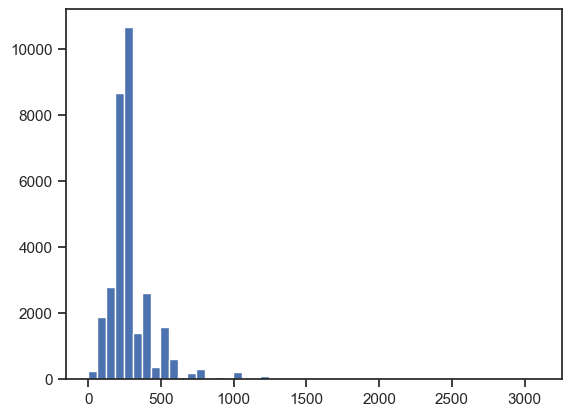

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
a = MinMaxScaler()
b = a.fit_transform(df[['Cost for two']])

plt.hist(df['Cost for two'], 50)
plt.show()

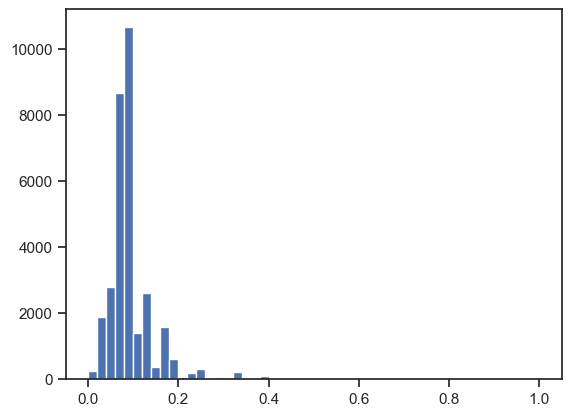

In [15]:
plt.hist(b, 50)
plt.show()